In [2]:
import os
import dandelion as ddl
import logging

ddl.logging.print_header()

dandelion==0.1.11.dev4 pandas==1.3.4 numpy==1.20.3 matplotlib==3.4.3 networkx==2.6.3 scipy==1.7.1 skbio==0.5.6


In [3]:
os.chdir('/home/jovyan/data/ClatCov/')

In [4]:
import pandas as pd
import numpy as np
import scanpy as sc
import warnings
import functools
import seaborn as sns
import scipy.stats
import anndata

In [5]:
#warnings.filterwarnings('ignore')
sc.logging.print_header()

scanpy==1.8.1 anndata==0.7.6 umap==0.5.2 numpy==1.20.3 scipy==1.7.1 pandas==1.3.4 scikit-learn==1.0.1 statsmodels==0.13.0 python-igraph==0.9.8 pynndescent==0.5.5


In [6]:
adata = sc.read_h5ad('COV_combined_all_fine_celltypes_BGC_broad2_v2.5.2_081221.h5ad')

In [7]:
adata

AnnData object with n_obs × n_vars = 212216 × 33538
    obs: 'latent_RT_efficiency', 'latent_cell_probability', 'latent_scale', 'sample_id', 'patient_id', 'sample_type', 'age_group', 'gender', 'cohort', 'disease_type', 'batch', 'study', 'nasal_inflammation', 'COVID_severity', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'scrublet_score', 'n_genes', 'gmm_pct_count_clusters_keep', 'is_doublet', 'filter_rna', 'leiden', 'celltypist_label', 'broad_celltypes', 'matt_fine_label', 'fine_celltypes', 'old_fine_celltypes', 'old_broad_celltypes', 'broad_celltypes2'
    uns: 'COVID_severity_colors', 'age_group_colors', 'broad_celltypes2_colors', 'broad_celltypes_colors', 'cohort_colors', 'disease_type_colors', 'fine_celltypes_colors', 'gender_colors', 'hvg', 'leiden', 'leiden_colors', 'matt_fine_label_colors', 'nasal_inflammation_colors', 'neighbors', 'old_broad_celltypes_colors', 'patient_id_colors', 'pca', 'sample_id_colors', 'sample_type_colors', 'study_colors', 'umap

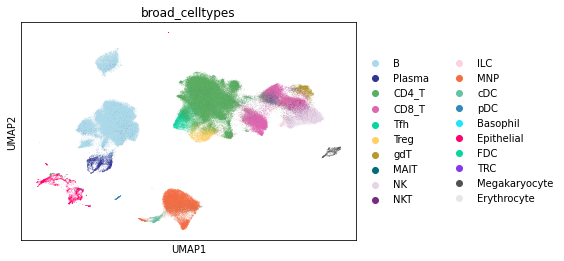

In [41]:
sc.pl.umap(adata, color = ['broad_celltypes'])

In [8]:
meta = pd.read_csv('BCR/COVID_NASAL_metadata_BCR_dandelion_sing_0921.csv')
meta

sample          prefix  individual
0       Sample_Fq7      Sample_Fq7    IRVAS_39
1      Sample_Fq21     Sample_Fq21     N01-001
2       Sample_Fq2      Sample_Fq2     N01-002
3       Sample_Fq6      Sample_Fq6    IRVAS_39
4      Sample_Fq20     Sample_Fq20     N01-001
5       Sample_Fq1      Sample_Fq1     N01-002
6   Sample_Fq1_COV  Sample_Fq1_COV           1
7   Sample_Fq2_COV  Sample_Fq2_COV           1
8   Sample_Fq3_COV  Sample_Fq3_COV           2
9   Sample_Fq4_COV  Sample_Fq4_COV           2
10  Sample_Fq5_COV  Sample_Fq5_COV           3
11  Sample_Fq6_COV  Sample_Fq6_COV           3
12      Sample_Fq5     Sample_Fq_5         C20
13      Sample_Fq8     Sample_Fq_8         C19
14      Sample_Fq9     Sample_Fq_9         C19
15     Sample_Fq10    Sample_Fq_10         C24
16     Sample_Fq11    Sample_Fq_11         C24
17     Sample_Fq14    Sample_Fq_14         C21
18     Sample_Fq15    Sample_Fq_15         C21
19     Sample_Fq18    Sample_Fq_18         C17
20     Sample_Fq19    Sample_Fq_19         C17
21     Sample_Fq38    Sample_Fq_38         C26
22       MC9785375       MC9785359   CV004_2_4
23       MC9785376       MC9785360   CV004_2_4
24       MC9785377       MC9785361   CV004_2_5
25       MC9785378       MC9785362   CV004_2_5
26       MC9785379       MC9785363   CV004_2_6
27       MC9785380       MC9785364   CV004_2_6
28       MC9785381       MC9785365   CV004_2_7
29       MC9785382       MC9785366   CV004_2_7
30       MC9785383       MC9785367   CV004_2_8
31       MC9785384       MC9785368   CV004_2_8
32       MC9785385       MC9785369   CV004_2_9
33       MC9785386       MC9785370   CV004_2_9
34       MC9785387       MC9785371  CV004_2_10
35       MC9785388       MC9785372  CV004_2_10
36       MC9785389       MC9785373  CV004_2_11
37       MC9785390       MC9785374  CV004_2_12
38       MC9785408       MC9785407  CV004_2_12

In [9]:
meta.individual

0       IRVAS_39
1        N01-001
2        N01-002
3       IRVAS_39
4        N01-001
5        N01-002
6              1
7              1
8              2
9              2
10             3
11             3
12           C20
13           C19
14           C19
15           C24
16           C24
17           C21
18           C21
19           C17
20           C17
21           C26
22     CV004_2_4
23     CV004_2_4
24     CV004_2_5
25     CV004_2_5
26     CV004_2_6
27     CV004_2_6
28     CV004_2_7
29     CV004_2_7
30     CV004_2_8
31     CV004_2_8
32     CV004_2_9
33     CV004_2_9
34    CV004_2_10
35    CV004_2_10
36    CV004_2_11
37    CV004_2_12
38    CV004_2_12
Name: individual, dtype: object

In [22]:
metaHealthy = meta[meta.individual.isin(['C17','C19','C20','C21','C24','C26'])].copy()
metaHealthy

sample        prefix individual
12   Sample_Fq5   Sample_Fq_5        C20
13   Sample_Fq8   Sample_Fq_8        C19
14   Sample_Fq9   Sample_Fq_9        C19
15  Sample_Fq10  Sample_Fq_10        C24
16  Sample_Fq11  Sample_Fq_11        C24
17  Sample_Fq14  Sample_Fq_14        C21
18  Sample_Fq15  Sample_Fq_15        C21
19  Sample_Fq18  Sample_Fq_18        C17
20  Sample_Fq19  Sample_Fq_19        C17
21  Sample_Fq38  Sample_Fq_38        C26

In [23]:
bcr_files = []
for sample in metaHealthy['sample']:
    file_location = 'BCR/BCR/' + sample +'/dandelion/filtered_contig_igblast_db-pass_genotyped.tsv'
    bcr_files.append(pd.read_csv(file_location, sep = '\t'))
bcr = bcr_files[0].append(bcr_files[1:])
bcr.reset_index(inplace = True, drop = True)
bcr

/home/jovyan/my-conda-envs/dandelion/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3444: DtypeWarning: Columns (53) have mixed types.Specify dtype option on import or set low_memory=False.


sequence_id  \
0       Sample_Fq_5_AAACCTGTCTCGCATC-1_contig_1   
1       Sample_Fq_5_AAACGGGAGGCATGTG-1_contig_2   
2       Sample_Fq_5_AAACGGGAGGTTACCT-1_contig_1   
3       Sample_Fq_5_AAAGATGAGCCACTAT-1_contig_1   
4       Sample_Fq_5_AAAGATGGTAGCTTGT-1_contig_1   
...                                         ...   
15664  Sample_Fq_38_TTTACTGAGCAATCTC-1_contig_1   
15665  Sample_Fq_38_TTTACTGCAAGTCTAC-1_contig_1   
15666  Sample_Fq_38_TTTATGCCAAGCCTAT-1_contig_1   
15667  Sample_Fq_38_TTTCCTCAGAGCCTAG-1_contig_1   
15668  Sample_Fq_38_TTTGTCAGTCTAGCGC-1_contig_2   

                                                sequence rev_comp productive  \
0      AGGAGTCAGACCCAGTCAGGACACAGCATGGACATGAGGGTCCCCG...        F          T   
1      AGGGCTGGTGGGATCAGTCCTGGTGGTAGCTCAGGAAGCAGAGCCT...        F          T   
2      GAGAAGAGCTGCTCAGTTAGGACCCAGAGGGAACCATGGAAACCCC...        F          T   
3      AAGAGCTGCTCAGTTAGGACCCAGAGGGAACCATGGAAACCCCAGC...        F          T   
4      GCTCTGCTTCAGCTGTGGGCACAAGAGGCAGCACTCAGGACAATCT...        F          T   
...                                                  ...      ...        ...   
15664  TGGTAGCTCAGGAAGCAGAGCCTGGAGCATCTCCACTATGGCCTGG...        F          T   
15665  CAGGAGTCAGTCGCAGTCAGGACACAGCATGGACATGAGGGTCCCC...        F          T   
15666  GTAGCTCAGGAAGCAGAGCCTGGAGCATCTCCACTATGGCCTGGGC...        F          T   
15667  GGAGGAACTGCTCAGTTAGGACCCAGACGGAACCATGGAAGCCCCA...        F          T   
15668  GCTGGGGTCTCAGGAGGCAGCGCTCTCAGGACATCTCCACCATGGC...        F          T   

                         v_call d_call             j_call  \
0                    IGKV1-5*03    NaN           IGKJ1*01   
1                   IGLV6-57*01    NaN  IGLJ2*01,IGLJ3*01   
2                   IGKV3-20*01    NaN           IGKJ4*01   
3                   IGKV3-20*01    NaN           IGKJ4*01   
4                   IGLV1-40*01    NaN           IGLJ1*01   
...                         ...    ...                ...   
15664               IGLV6-57*01    NaN           IGLJ1*01   
15665  IGKV1-39*01,IGKV1D-39*01    NaN           IGKJ2*01   
15666               IGLV6-57*01    NaN           IGLJ1*01   
15667               IGKV3-15*01    NaN           IGKJ1*01   
15668   IGLV2-14*01,IGLV2-14*03    NaN           IGLJ1*01   

                                      sequence_alignment  \
0      GACATCCAGATGACCCAGTCTCCTTCCACCCTGTCTGCATCTGTAG...   
1      AATTTTATGCTGACTCAGTCCCACTCT...GTGTCGGAGTCTCCGG...   
2      GAAATTGTGTTGACGCAGTCTCCAGGCACCCTGTCTTTGTCTCCAG...   
3      GAAATTGTGTTGACGCAGTCTCCAGGCACCCTGTCCTTGTCTCCAG...   
4      CAGTCTGTGCTGACGCAGCCGCCCTCA...GTGTCTGGGGCCCCAG...   
...                                                  ...   
15664  ..TTTTAAGCTGACTCAGCCCCACTCT...GTGTCGGGGTCTCCGG...   
15665  GACATCCAGATGACCCAGTTTCCATCGTCCCTGTCTGCATCTGTCG...   
15666  ..TTTTAAGCTGACTCAGCCCCACTCT...GTGTCGGGGTCTCCGG...   
15667  GAATTAGTGATGACGCAGTCTCCAGCCACCCTGTCTGTGTCCCCAG...   
15668  CAGTCTGCCCTGACTCAGCCTGCCTCC...GTGTCTGGGTCTCCTG...   

                                      germline_alignment  \
0      GACATCCAGATGACCCAGTCTCCTTCCACCCTGTCTGCATCTGTAG...   
1      AATTTTATGCTGACTCAGCCCCACTCT...GTGTCGGAGTCTCCGG...   
2      GAAATTGTGTTGACGCAGTCTCCAGGCACCCTGTCTTTGTCTCCAG...   
3      GAAATTGTGTTGACGCAGTCTCCAGGCACCCTGTCTTTGTCTCCAG...   
4      CAGTCTGTGCTGACGCAGCCGCCCTCA...GTGTCTGGGGCCCCAG...   
...                                                  ...   
15664  AATTTTATGCTGACTCAGCCCCACTCT...GTGTCGGAGTCTCCGG...   
15665  GACATCCAGATGACCCAGTCTCCATCCTCCCTGTCTGCATCTGTAG...   
15666  AATTTTATGCTGACTCAGCCCCACTCT...GTGTCGGAGTCTCCGG...   
15667  GAAATAGTGATGACGCAGTCTCCAGCCACCCTGTCTGTGTCTCCAG...   
15668  CAGTCTGCCCTGACTCAGCCTGCCTCC...GTGTCTGGGTCTCCTG...   

                                      junction  ...     fwr4_aa    cdr1_aa  \
0         TGCCAACAGTATAATAGTTATTCTCCGTGGACGTTC  ...  FGQGTKVEIK     QSISSW   
1            TGTCAGTCTTATGATAGCAGCACTGTCGTATTC  ...  FGGGTKLTVL   SGSIASNY   
2         TGTCAGCAGTATGGTAGCTCACCGGGGCTCACTTTC  ...  

In [12]:
adata.obs

latent_RT_efficiency  \
Sample_Fq1_COV_CAAGAAAAGTCAAGCG-1              0.989718   
Sample_Fq1_COV_TAAGTGCCAGGGATTG-1              1.086451   
Sample_Fq1_COV_GGCGTGTAGGCAGGTT-1              1.031229   
Sample_Fq1_COV_AGGTCATAGACGCAAC-1              1.025128   
Sample_Fq1_COV_ACCCACTGTGCTTCTC-1              1.001242   
...                                                 ...   
Sample_Fq87_GGTGAAGTCAAGAAGT-1                 0.822940   
Sample_Fq87_TTGGCAAAGCTTTGGT-1                 0.532447   
Sample_Fq87_TCTTTCCCAAGGTTCT-1                 0.583494   
Sample_Fq87_AAGGCAGTCCACGCAG-1                 0.503565   
Sample_Fq87_AACTCCCCATCGATTG-1                 0.582354   

                                   latent_cell_probability  latent_scale  \
Sample_Fq1_COV_CAAGAAAAGTCAAGCG-1                 0.998506    633.664124   
Sample_Fq1_COV_TAAGTGCCAGGGATTG-1                 0.997471    642.127869   
Sample_Fq1_COV_GGCGTGTAGGCAGGTT-1                 0.997455    631.490479   
Sample_Fq1_COV_AGGTCATAGACGCAAC-1                 0.997821    642.193420   
Sample_Fq1_COV_ACCCACTGTGCTTCTC-1                 0.998025    637.851501   
...                                                    ...           ...   
Sample_Fq87_GGTGAAGTCAAGAAGT-1                    0.990659   3160.730713   
Sample_Fq87_TTGGCAAAGCTTTGGT-1                    0.986922   3133.792725   
Sample_Fq87_TCTTTCCCAAGGTTCT-1                    0.991922   3156.019775   
Sample_Fq87_AAGGCAGTCCACGCAG-1                    0.964627   3070.484375   
Sample_Fq87_AACTCCCCATCGATTG-1                    0.867043   3171.860840   

                                        sample_id patient_id sample_type  \
Sample_Fq1_COV_CAAGAAAAGTCAAGCG-1  Sample_Fq1_COV          1       blood   
Sample_Fq1_COV_TAAGTGCCAGGGATTG-1  Sample_Fq1_COV          1       blood   
Sample_Fq1_COV_GGCGTGTAGGCAGGTT-1  Sample_Fq1_COV          1       blood   
Sample_Fq1_COV_AGGTCATAGACGCAAC-1  Sample_Fq1_COV          1       blood   
Sample_Fq1_COV_ACCCACTGTGCTTCTC-1  Sample_Fq1_COV          1       blood   
...                                           ...        ...         ...   
Sample_Fq87_GGTGAAGTCAAGAAGT-1        Sample_Fq87    N01-022       blood   
Sample_Fq87_TTGGCAAAGCTTTGGT-1        Sample_Fq87    N01-022       blood   
Sample_Fq87_TCTTTCCCAAGGTTCT-1        Sample_Fq87    N01-022       blood   
Sample_Fq87_AAGGCAGTCCACGCAG-1        Sample_Fq87    N01-022       blood   
Sample_Fq87_AACTCCCCATCGATTG-1        Sample_Fq87    N01-022       blood   

                                  age_group gender   cohort disease_type  ...  \
Sample_Fq1_COV_CAAGAAAAGTCAAGCG-1       old      M    COVID   Active_COV  ...   
Sample_Fq1_COV_TAAGTGCCAGGGATTG-1       old      M    COVID   Active_COV  ...   
Sample_Fq1_COV_GGCGTGTAGGCAGGTT-1       old      M    COVID   Active_COV  ...   
Sample_Fq1_COV_AGGTCATAGACGCAAC-1       old      M    COVID   Active_COV  ...   
Sample_Fq1_COV_ACCCACTGTGCTTCTC-1       old      M    COVID   Active_COV  ...   
...                                     ...    ...      ...          ...  ...   
Sample_Fq87_GGTGAAGTCAAGAAGT-1       middle      F  control  GPA_control  ...   
Sample_Fq87_TTGGCAAAGCTTTGGT-1       middle      F  control  GPA_control  ...   
Sample_Fq87_TCTTTCCCAAGGTTCT-1       middle      F  control  GPA_control  ...   
Sample_Fq87_AAGGCAGTCCACGCAG-1       middle      F  control  GPA_control  ...   
Sample_Fq87_AACTCCCCATCGATTG-1       middle      F  control  GPA_control  ...   

                                  is_doublet filter_rna leiden  \
Sample_Fq1_COV_CAAGAAAAGTCAAGCG-1      False      False     35   
Sample_Fq1_COV_TAAGTGCCAGGGATTG-1      False      False     31   
Sample_Fq1_COV_GGCGTGTAGGCAGGTT-1      False      False      2   
Sample_Fq1_COV_AGGTCATAGACGCAAC-1      False      False      0   
Sample_Fq1_COV_ACCCACTGTGCTTCTC-1      False      False     29   
...                                      ...        ...    ...   
Sample_Fq87_GGTGAAGTCAAGAAGT-1         False      False     39   

In [13]:
#adata.obs_names = [b + '_' + a.split('-')[0] + '-1' for a,b in zip(adata.obs_names, adata.obs['Sampleid'])]
#adata.obs

In [14]:
adata.obs[adata.obs_names=='Sample_Fq1_TTTCCTCCATACAGCT-1']

Empty DataFrame
Columns: [latent_RT_efficiency, latent_cell_probability, latent_scale, sample_id, patient_id, sample_type, age_group, gender, cohort, disease_type, batch, study, nasal_inflammation, COVID_severity, n_genes_by_counts, total_counts, total_counts_mt, pct_counts_mt, scrublet_score, n_genes, gmm_pct_count_clusters_keep, is_doublet, filter_rna, leiden, celltypist_label, broad_celltypes, matt_fine_label, fine_celltypes, old_fine_celltypes, old_broad_celltypes, broad_celltypes2]
Index: []

[0 rows x 31 columns]

In [24]:
#vdj, adata = ddl.pp.filter_contigs(bcr, adata, simple = True)
vdj, adata = ddl.pp.filter_contigs(bcr, adata, filter_contig = False)

Preparing data
Preparing data?it/s]
Preparing data 149.11it/s]
Preparing data, 606.40it/s]
Preparing data, 758.29it/s]
Preparing data, 823.42it/s]
Preparing data, 864.72it/s]
Preparing data, 886.77it/s]
Preparing data, 891.63it/s]
Preparing data, 899.59it/s]
Preparing data, 895.01it/s]
Preparing data, 892.70it/s]
Preparing data, 898.35it/s]
Preparing data1, 904.42it/s]
Preparing data1, 910.36it/s]
Preparing data1, 914.52it/s]
Preparing data1, 912.88it/s]
Preparing data1, 909.28it/s]
Preparing data1, 912.31it/s]
Preparing data1, 914.03it/s]
Preparing data1, 915.77it/s]
Preparing data2, 930.70it/s]
Preparing data2, 944.97it/s]
Preparing data2, 961.91it/s]
Preparing data2, 975.93it/s]
Preparing data2, 979.07it/s]
Preparing data2, 985.29it/s]
Preparing data2, 993.75it/s]
Preparing data2, 993.79it/s]
Preparing data2, 990.86it/s]
Preparing data2, 985.18it/s]
Preparing data3, 991.12it/s]
Preparing data3, 991.47it/s]
Preparing data3, 997.70it/s]
Preparing data3, 992.05it/s]
Preparing data3, 99

Initializing Dandelion object


In [25]:
vdj

Dandelion class object with n_obs = 9948 and n_contigs = 15273
    data: 'sequence_id', 'sequence', 'rev_comp', 'productive', 'v_call', 'd_call', 'j_call', 'sequence_alignment', 'germline_alignment', 'junction', 'junction_aa', 'v_cigar', 'd_cigar', 'j_cigar', 'stop_codon', 'vj_in_frame', 'locus', 'junction_length', 'np1_length', 'np2_length', 'v_sequence_start', 'v_sequence_end', 'v_germline_start', 'v_germline_end', 'd_sequence_start', 'd_sequence_end', 'd_germline_start', 'd_germline_end', 'j_sequence_start', 'j_sequence_end', 'j_germline_start', 'j_germline_end', 'v_score', 'v_identity', 'v_support', 'd_score', 'd_identity', 'd_support', 'j_score', 'j_identity', 'j_support', 'fwr1', 'fwr2', 'fwr3', 'fwr4', 'cdr1', 'cdr2', 'cdr3', 'cell_id', 'c_call', 'consensus_count', 'umi_count', 'v_call_10x', 'd_call_10x', 'j_call_10x', 'junction_10x', 'junction_10x_aa', 'v_call_genotyped', 'germline_alignment_d_mask', 'sample_id', 'c_sequence_alignment', 'c_germline_alignment', 'c_sequence_start

In [17]:
adata

AnnData object with n_obs × n_vars = 212216 × 33538
    obs: 'latent_RT_efficiency', 'latent_cell_probability', 'latent_scale', 'sample_id', 'patient_id', 'sample_type', 'age_group', 'gender', 'cohort', 'disease_type', 'batch', 'study', 'nasal_inflammation', 'COVID_severity', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'scrublet_score', 'n_genes', 'gmm_pct_count_clusters_keep', 'is_doublet', 'filter_rna', 'leiden', 'celltypist_label', 'broad_celltypes', 'matt_fine_label', 'fine_celltypes', 'old_fine_celltypes', 'old_broad_celltypes', 'broad_celltypes2', 'has_contig', 'filter_contig_quality', 'filter_contig_VDJ', 'filter_contig_VJ', 'contig_QC_pass', 'filter_contig'
    uns: 'COVID_severity_colors', 'age_group_colors', 'broad_celltypes2_colors', 'broad_celltypes_colors', 'cohort_colors', 'disease_type_colors', 'fine_celltypes_colors', 'gender_colors', 'hvg', 'leiden', 'leiden_colors', 'matt_fine_label_colors', 'nasal_inflammation_colors', 'neighbors', 'old_b

In [18]:
adata.obs

latent_RT_efficiency  \
Sample_Fq1_COV_CAAGAAAAGTCAAGCG-1              0.989718   
Sample_Fq1_COV_TAAGTGCCAGGGATTG-1              1.086451   
Sample_Fq1_COV_GGCGTGTAGGCAGGTT-1              1.031229   
Sample_Fq1_COV_AGGTCATAGACGCAAC-1              1.025128   
Sample_Fq1_COV_ACCCACTGTGCTTCTC-1              1.001242   
...                                                 ...   
Sample_Fq87_GGTGAAGTCAAGAAGT-1                 0.822940   
Sample_Fq87_TTGGCAAAGCTTTGGT-1                 0.532447   
Sample_Fq87_TCTTTCCCAAGGTTCT-1                 0.583494   
Sample_Fq87_AAGGCAGTCCACGCAG-1                 0.503565   
Sample_Fq87_AACTCCCCATCGATTG-1                 0.582354   

                                   latent_cell_probability  latent_scale  \
Sample_Fq1_COV_CAAGAAAAGTCAAGCG-1                 0.998506    633.664124   
Sample_Fq1_COV_TAAGTGCCAGGGATTG-1                 0.997471    642.127869   
Sample_Fq1_COV_GGCGTGTAGGCAGGTT-1                 0.997455    631.490479   
Sample_Fq1_COV_AGGTCATAGACGCAAC-1                 0.997821    642.193420   
Sample_Fq1_COV_ACCCACTGTGCTTCTC-1                 0.998025    637.851501   
...                                                    ...           ...   
Sample_Fq87_GGTGAAGTCAAGAAGT-1                    0.990659   3160.730713   
Sample_Fq87_TTGGCAAAGCTTTGGT-1                    0.986922   3133.792725   
Sample_Fq87_TCTTTCCCAAGGTTCT-1                    0.991922   3156.019775   
Sample_Fq87_AAGGCAGTCCACGCAG-1                    0.964627   3070.484375   
Sample_Fq87_AACTCCCCATCGATTG-1                    0.867043   3171.860840   

                                        sample_id patient_id sample_type  \
Sample_Fq1_COV_CAAGAAAAGTCAAGCG-1  Sample_Fq1_COV          1       blood   
Sample_Fq1_COV_TAAGTGCCAGGGATTG-1  Sample_Fq1_COV          1       blood   
Sample_Fq1_COV_GGCGTGTAGGCAGGTT-1  Sample_Fq1_COV          1       blood   
Sample_Fq1_COV_AGGTCATAGACGCAAC-1  Sample_Fq1_COV          1       blood   
Sample_Fq1_COV_ACCCACTGTGCTTCTC-1  Sample_Fq1_COV          1       blood   
...                                           ...        ...         ...   
Sample_Fq87_GGTGAAGTCAAGAAGT-1        Sample_Fq87    N01-022       blood   
Sample_Fq87_TTGGCAAAGCTTTGGT-1        Sample_Fq87    N01-022       blood   
Sample_Fq87_TCTTTCCCAAGGTTCT-1        Sample_Fq87    N01-022       blood   
Sample_Fq87_AAGGCAGTCCACGCAG-1        Sample_Fq87    N01-022       blood   
Sample_Fq87_AACTCCCCATCGATTG-1        Sample_Fq87    N01-022       blood   

                                  age_group gender   cohort disease_type  ...  \
Sample_Fq1_COV_CAAGAAAAGTCAAGCG-1       old      M    COVID   Active_COV  ...   
Sample_Fq1_COV_TAAGTGCCAGGGATTG-1       old      M    COVID   Active_COV  ...   
Sample_Fq1_COV_GGCGTGTAGGCAGGTT-1       old      M    COVID   Active_COV  ...   
Sample_Fq1_COV_AGGTCATAGACGCAAC-1       old      M    COVID   Active_COV  ...   
Sample_Fq1_COV_ACCCACTGTGCTTCTC-1       old      M    COVID   Active_COV  ...   
...                                     ...    ...      ...          ...  ...   
Sample_Fq87_GGTGAAGTCAAGAAGT-1       middle      F  control  GPA_control  ...   
Sample_Fq87_TTGGCAAAGCTTTGGT-1       middle      F  control  GPA_control  ...   
Sample_Fq87_TCTTTCCCAAGGTTCT-1       middle      F  control  GPA_control  ...   
Sample_Fq87_AAGGCAGTCCACGCAG-1       middle      F  control  GPA_control  ...   
Sample_Fq87_AACTCCCCATCGATTG-1       middle      F  control  GPA_control  ...   

                                           fine_celltypes  \
Sample_Fq1_COV_CAAGAAAAGTCAAGCG-1  Macrophage_nonresident   
Sample_Fq1_COV_TAAGTGCCAGGGATTG-1                  CD8_Tn   
Sample_Fq1_COV_GGCGTGTAGGCAGGTT-1                  CD8_Tn   
Sample_Fq1_COV_AGGTCATAGACGCAAC-1      Monocyte_classical   
Sample_Fq1_COV_ACCCACTGTGCTTCTC-1               cDC_CD1c+   
...                                                   ...   
Sample_Fq87_GGTGAAGTCAAGAAGT-1              Megakaryocyte   
Sample_Fq87_TTGGCAAAGCTTTGGT-1         

In [26]:
pd.crosstab(adata.obs['has_contig'], adata.obs['filter_contig'])

filter_contig   False
has_contig           
No_contig      209442
True             2774

/home/jovyan/my-conda-envs/dandelion/lib/python3.7/site-packages/anndata/_core/anndata.py:1220: FutureWarning: The `inplace` parameter in pandas.Categorical.reorder_categories is deprecated and will be removed in a future version. Reordering categories will always return a new Categorical object.
... storing 'has_contig' as categorical
/home/jovyan/my-conda-envs/dandelion/lib/python3.7/site-packages/anndata/_core/anndata.py:1220: FutureWarning: The `inplace` parameter in pandas.Categorical.reorder_categories is deprecated and will be removed in a future version. Reordering categories will always return a new Categorical object.
... storing 'filter_contig_quality' as categorical
/home/jovyan/my-conda-envs/dandelion/lib/python3.7/site-packages/anndata/_core/anndata.py:1220: FutureWarning: The `inplace` parameter in pandas.Categorical.reorder_categories is deprecated and will be removed in a future version. Reordering categories will always return a new Categorical object.
... storing 'fi

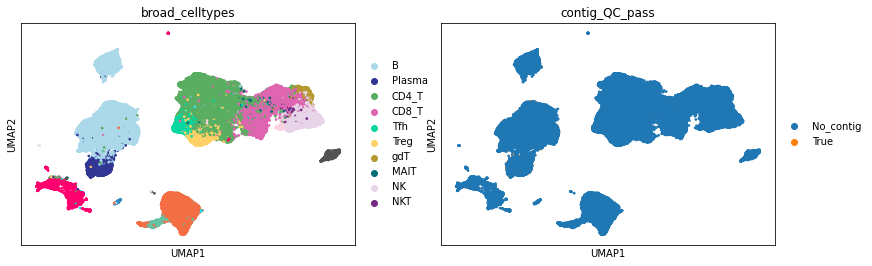

In [27]:
sc.pl.umap(adata, color=['broad_celltypes', 'contig_QC_pass'], size = 30)

In [ ]:
adata

In [18]:
#save Dandelion object
vdj.write_h5('BCR/cCOVBPlasmasubset_BCR_041121_dandelion_results.h5', compression = 'blosc:lz4')

In [19]:
#save BCR annotated anndata object
adata.write('BCR/BCRanno_cCOVBPlasmasubset_r2v2.5_041121.h5ad', compression = 'gzip')

In [8]:
adata = sc.read_h5ad('BCR/BCRanno_cCOVBPlasmasubset_r2v2.5_041121.h5ad')

In [9]:
adata

AnnData object with n_obs × n_vars = 18682 × 1920
    obs: 'latent_RT_efficiency', 'latent_cell_probability', 'latent_scale', 'sample_id', 'patient_id', 'sample_type', 'age_group', 'gender', 'cohort', 'disease_type', 'batch', 'study', 'nasal_inflammation', 'COVID_severity', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'scrublet_score', 'n_genes', 'gmm_pct_count_clusters_keep', 'is_doublet', 'filter_rna', 'leiden', 'celltypist_label', 'broad_celltypes', 'matt_fine_label', 'fine_celltypes', 'old_fine_celltypes', 'old_broad_celltypes', 'has_contig', 'filter_contig_quality', 'filter_contig_VDJ', 'filter_contig_VJ', 'contig_QC_pass', 'filter_contig'
    var: 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'mean', 'std'
    uns: 'COVID_severity_colors', 'age_group_colors', 'broad_celltypes_colors', 'cohort_colors', 'contig_QC_pass_colors', 'disease_type_colors', 'fine_celltypes_colors', 'gender_colors', 'hvg', 'leiden', 'leiden_colors', 'matt_fine_l

In [6]:
#vdj = ddl.read_h5('BCR/aCOVsubset_BCR_041121_dandelion_results.h5')
#vdj

Dandelion class object with n_obs = 9844 and n_contigs = 19558
    data: 'sequence_id', 'sequence', 'rev_comp', 'productive', 'v_call', 'd_call', 'j_call', 'sequence_alignment', 'germline_alignment', 'junction', 'junction_aa', 'v_cigar', 'd_cigar', 'j_cigar', 'stop_codon', 'vj_in_frame', 'locus', 'junction_length', 'np1_length', 'np2_length', 'v_sequence_start', 'v_sequence_end', 'v_germline_start', 'v_germline_end', 'd_sequence_start', 'd_sequence_end', 'd_germline_start', 'd_germline_end', 'j_sequence_start', 'j_sequence_end', 'j_germline_start', 'j_germline_end', 'v_score', 'v_identity', 'v_support', 'd_score', 'd_identity', 'd_support', 'j_score', 'j_identity', 'j_support', 'fwr1', 'fwr2', 'fwr3', 'fwr4', 'cdr1', 'cdr2', 'cdr3', 'cell_id', 'c_call', 'consensus_count', 'umi_count', 'v_call_10x', 'd_call_10x', 'j_call_10x', 'junction_10x', 'junction_10x_aa', 'v_call_genotyped', 'germline_alignment_d_mask', 'sample_id', 'c_sequence_alignment', 'c_germline_alignment', 'c_sequence_start

In [7]:
#adata = sc.read_h5ad('BCR/BCRanno_aCOVsubset_r2v2.5_041121.h5ad')
#adata

AnnData object with n_obs × n_vars = 55529 × 1723
    obs: 'latent_RT_efficiency', 'latent_cell_probability', 'latent_scale', 'sample_id', 'patient_id', 'sample_type', 'age_group', 'gender', 'cohort', 'disease_type', 'batch', 'study', 'nasal_inflammation', 'COVID_severity', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'scrublet_score', 'n_genes', 'gmm_pct_count_clusters_keep', 'is_doublet', 'filter_rna', 'leiden', 'celltypist_label', 'broad_celltypes', 'matt_fine_label', 'fine_celltypes', 'old_fine_celltypes', 'old_broad_celltypes', 'has_contig', 'filter_contig_quality', 'filter_contig_VDJ', 'filter_contig_VJ', 'contig_QC_pass', 'filter_contig'
    var: 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'mean', 'std'
    uns: 'COVID_severity_colors', 'age_group_colors', 'broad_celltypes_colors', 'cohort_colors', 'contig_QC_pass_colors', 'disease_type_colors', 'fine_celltypes_colors', 'gender_colors', 'hvg', 'leiden', 'leiden_colors', 'matt_fine_l

In [19]:
ddl.tl.find_clones(vdj)
vdj

Finding clones based on VDJ chains : 100%|██████████| 123/123 [00:00<00:00, 4602.67it/s]
Refining clone assignment based on VJ chain pairing : 100%|██████████| 422/422 [00:00<00:00, 455128.90it/s]


Dandelion class object with n_obs = 422 and n_contigs = 844
    data: 'sequence_id', 'sequence', 'rev_comp', 'productive', 'v_call', 'd_call', 'j_call', 'sequence_alignment', 'germline_alignment', 'junction', 'junction_aa', 'v_cigar', 'd_cigar', 'j_cigar', 'stop_codon', 'vj_in_frame', 'locus', 'junction_length', 'np1_length', 'np2_length', 'v_sequence_start', 'v_sequence_end', 'v_germline_start', 'v_germline_end', 'd_sequence_start', 'd_sequence_end', 'd_germline_start', 'd_germline_end', 'j_sequence_start', 'j_sequence_end', 'j_germline_start', 'j_germline_end', 'v_score', 'v_identity', 'v_support', 'd_score', 'd_identity', 'd_support', 'j_score', 'j_identity', 'j_support', 'fwr1', 'fwr2', 'fwr3', 'fwr4', 'cdr1', 'cdr2', 'cdr3', 'cell_id', 'c_call', 'consensus_count', 'umi_count', 'v_call_10x', 'd_call_10x', 'j_call_10x', 'junction_10x', 'junction_10x_aa', 'v_call_genotyped', 'germline_alignment_d_mask', 'sample_id', 'c_sequence_alignment', 'c_germline_alignment', 'c_sequence_start', 

In [20]:
ddl.tl.generate_network(vdj)

Linking edges : 100%|██████████| 414/414 [00:00<00:00, 6562.24it/s]


generating network layout


In [21]:
vdj

Dandelion class object with n_obs = 422 and n_contigs = 844
    data: 'sequence_id', 'sequence', 'rev_comp', 'productive', 'v_call', 'd_call', 'j_call', 'sequence_alignment', 'germline_alignment', 'junction', 'junction_aa', 'v_cigar', 'd_cigar', 'j_cigar', 'stop_codon', 'vj_in_frame', 'locus', 'junction_length', 'np1_length', 'np2_length', 'v_sequence_start', 'v_sequence_end', 'v_germline_start', 'v_germline_end', 'd_sequence_start', 'd_sequence_end', 'd_germline_start', 'd_germline_end', 'j_sequence_start', 'j_sequence_end', 'j_germline_start', 'j_germline_end', 'v_score', 'v_identity', 'v_support', 'd_score', 'd_identity', 'd_support', 'j_score', 'j_identity', 'j_support', 'fwr1', 'fwr2', 'fwr3', 'fwr4', 'cdr1', 'cdr2', 'cdr3', 'cell_id', 'c_call', 'consensus_count', 'umi_count', 'v_call_10x', 'd_call_10x', 'j_call_10x', 'junction_10x', 'junction_10x_aa', 'v_call_genotyped', 'germline_alignment_d_mask', 'sample_id', 'c_sequence_alignment', 'c_germline_alignment', 'c_sequence_start', 

In [ ]:
vdj.write_h5('BCR/cCOVBPlasmasubset_BCR_041121_dandelion_results.h5', complib = 'bzip2')

In [10]:
vdj = ddl.read_h5('BCR/cCOVBPlasmasubset_BCR_041121_dandelion_results.h5')
vdj

Dandelion class object with n_obs = 10881 and n_contigs = 21737
    data: 'sequence_id', 'sequence', 'rev_comp', 'productive', 'v_call', 'd_call', 'j_call', 'sequence_alignment', 'germline_alignment', 'junction', 'junction_aa', 'v_cigar', 'd_cigar', 'j_cigar', 'stop_codon', 'vj_in_frame', 'locus', 'junction_length', 'np1_length', 'np2_length', 'v_sequence_start', 'v_sequence_end', 'v_germline_start', 'v_germline_end', 'd_sequence_start', 'd_sequence_end', 'd_germline_start', 'd_germline_end', 'j_sequence_start', 'j_sequence_end', 'j_germline_start', 'j_germline_end', 'v_score', 'v_identity', 'v_support', 'd_score', 'd_identity', 'd_support', 'j_score', 'j_identity', 'j_support', 'fwr1', 'fwr2', 'fwr3', 'fwr4', 'cdr1', 'cdr2', 'cdr3', 'cell_id', 'c_call', 'consensus_count', 'umi_count', 'v_call_10x', 'd_call_10x', 'j_call_10x', 'junction_10x', 'junction_10x_aa', 'v_call_genotyped', 'germline_alignment_d_mask', 'sample_id', 'c_sequence_alignment', 'c_germline_alignment', 'c_sequence_star

In [22]:
ddl.tl.transfer(adata, vdj) # this will include singletons. To show only expanded clones, specify expanded_only=True
adata

converting matrices
Updating anndata slots


AnnData object with n_obs × n_vars = 15769 × 1951
    obs: 'latent_RT_efficiency', 'latent_cell_probability', 'latent_scale', 'sample_id', 'patient_id', 'sample_type', 'age_group', 'gender', 'cohort', 'disease_type', 'batch', 'study', 'nasal_inflammation', 'COVID_severity', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'scrublet_score', 'n_genes', 'gmm_pct_count_clusters_keep', 'is_doublet', 'filter_rna', 'leiden', 'celltypist_label', 'broad_celltypes', 'matt_fine_label', 'fine_celltypes', 'old_fine_celltypes', 'old_broad_celltypes', 'has_contig', 'filter_contig_quality', 'filter_contig_VDJ', 'filter_contig_VJ', 'contig_QC_pass', 'filter_contig', 'clone_id', 'clone_id_by_size', 'locus_VDJ', 'locus_VJ', 'productive_VDJ', 'productive_VJ', 'v_call_genotyped_VDJ', 'v_call_genotyped_VJ', 'd_call_VDJ', 'j_call_VDJ', 'j_call_VJ', 'c_call_VDJ', 'c_call_VJ', 'duplicate_count_VDJ', 'duplicate_count_VJ', 'duplicate_count_VDJ_1', 'duplicate_count_VJ_1', 'duplicate_count_

/home/jovyan/my-conda-envs/dandelion/lib/python3.7/site-packages/anndata/_core/anndata.py:1220: FutureWarning: The `inplace` parameter in pandas.Categorical.reorder_categories is deprecated and will be removed in a future version. Reordering categories will always return a new Categorical object.
... storing 'clone_id' as categorical
/home/jovyan/my-conda-envs/dandelion/lib/python3.7/site-packages/anndata/_core/anndata.py:1220: FutureWarning: The `inplace` parameter in pandas.Categorical.reorder_categories is deprecated and will be removed in a future version. Reordering categories will always return a new Categorical object.
... storing 'locus_VDJ' as categorical
/home/jovyan/my-conda-envs/dandelion/lib/python3.7/site-packages/anndata/_core/anndata.py:1220: FutureWarning: The `inplace` parameter in pandas.Categorical.reorder_categories is deprecated and will be removed in a future version. Reordering categories will always return a new Categorical object.
... storing 'locus_VJ' as cat

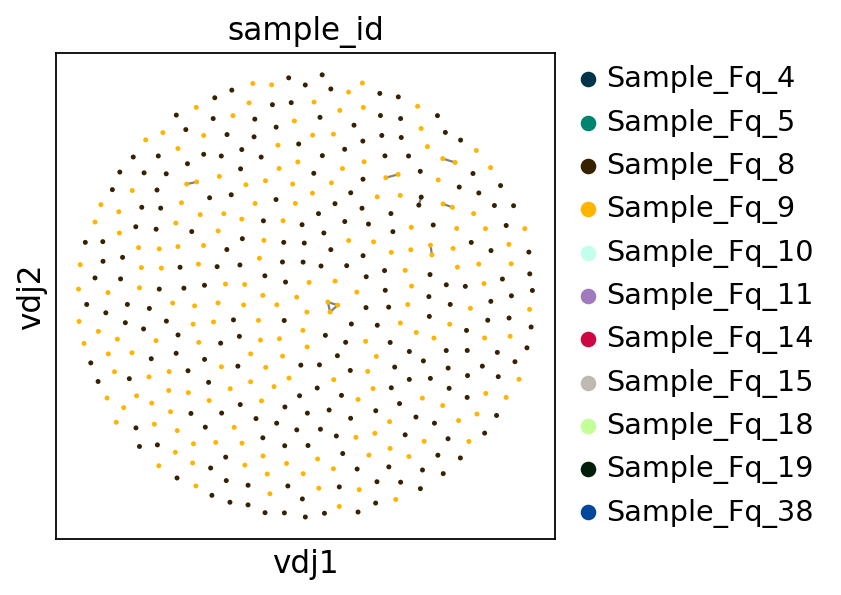

In [23]:
sc.set_figure_params(figsize = [4,4])
ddl.pl.clone_network(adata,
                     color = ['sample_id'],
                     edges_width = 1,
                     size = 20)

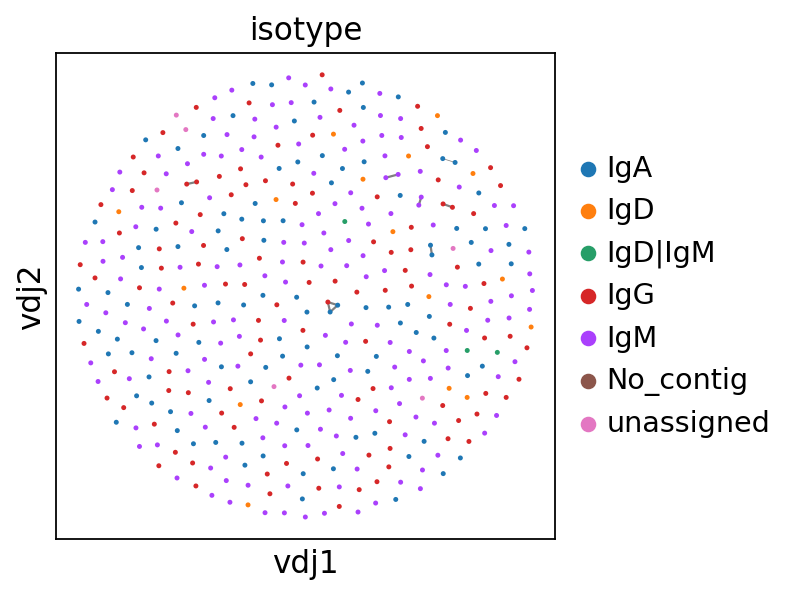

In [24]:
edgeweights = [1/(e+1) for e in ddl.tl.extract_edge_weights(vdj)] # add 1 to each edge weight (e) so that distance of 0 becomes the thickest edge
ddl.pl.clone_network(adata,
                     color = ['isotype'],
                     legend_fontoutline=3,
                     edges_width = edgeweights,
                     size = 20)

In [58]:
sc.set_figure_params(figsize = [4,4])

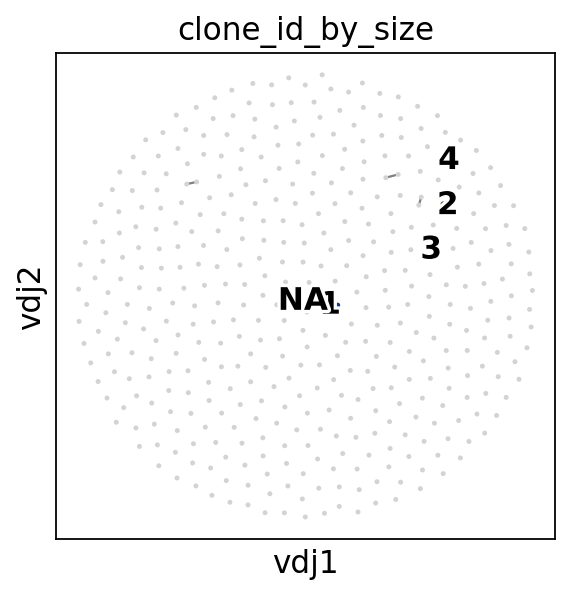

In [25]:
from scanpy.plotting.palettes import default_28, default_102
sc.set_figure_params(figsize = [4,4])
# plot the 3 largest clones by size
ddl.pl.clone_network(adata,
                     color = ['clone_id_by_size'],
                     groups = ['1', '2', '3','4'],
                     ncols = 2,
                     legend_loc = 'on data',
                     legend_fontoutline=3,
                     edges_width = edgeweights,
                     size = 20,
                     palette = default_28)

In [15]:
ddl.tl.clone_size(vdj)
ddl.tl.transfer(adata, vdj, expanded_only = True)


converting matrices
Updating anndata slots


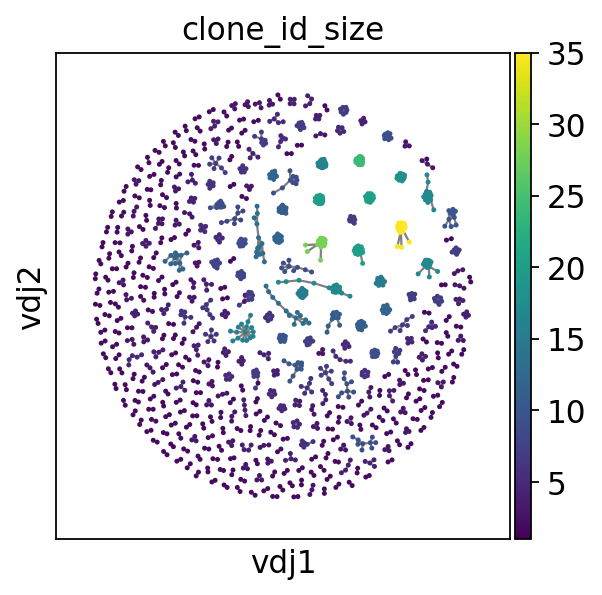

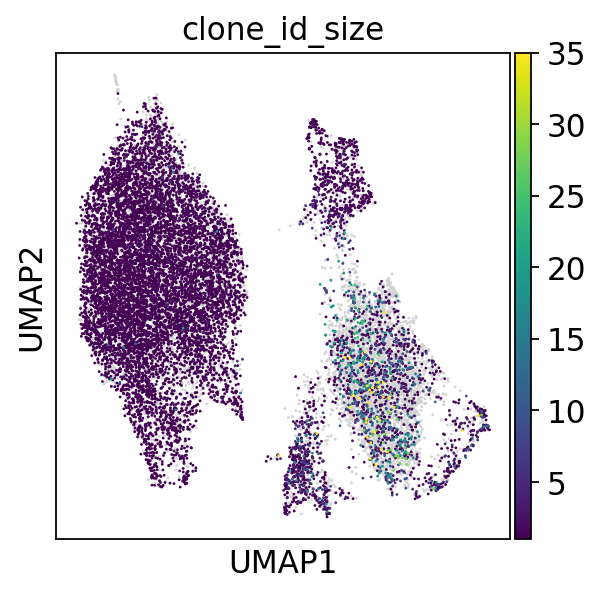

In [16]:
ddl.pl.clone_network(adata,
                     color = ['clone_id_size'],
                     legend_loc = 'none',
                     legend_fontoutline=3,
                     edges_width = 1,
                     size = 20)
sc.pl.umap(adata, color = ['clone_id_size'])

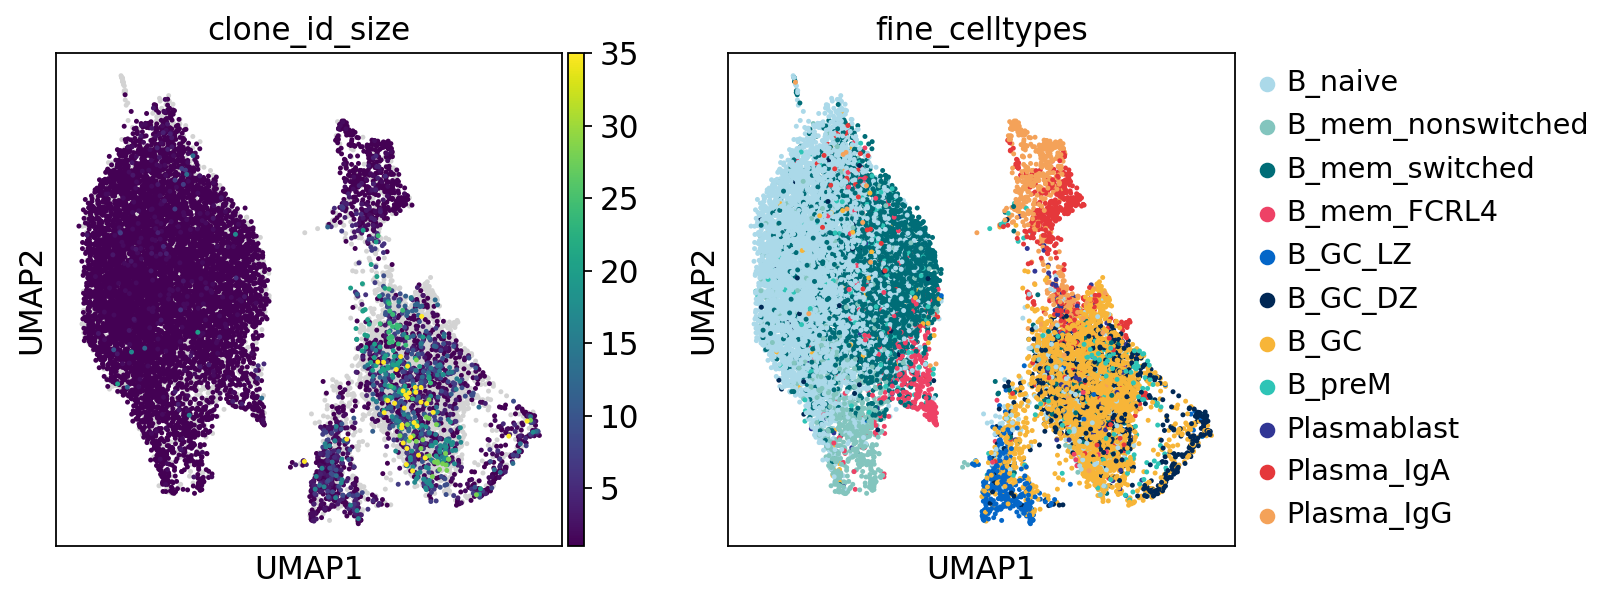

In [27]:
sc.pl.umap(adata, color = ['clone_id_size', 'fine_celltypes'], size = 20)

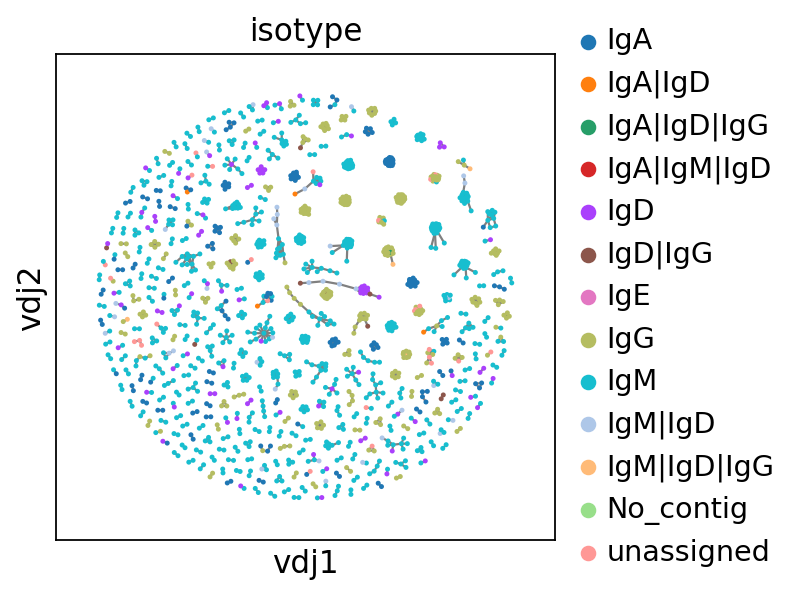

In [18]:
ddl.pl.clone_network(adata,
                     color = ['isotype'],
                     legend_fontoutline=3,
                     edges_width = 1,
                     size = 20)

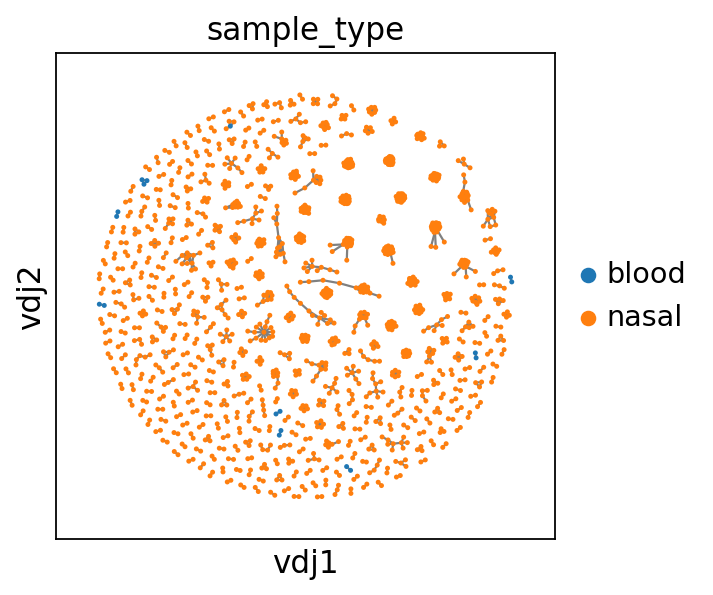

In [19]:
ddl.pl.clone_network(adata,
                     color = ['sample_type'],
                     legend_fontoutline=3,
                     edges_width = 1,
                     size = 20)

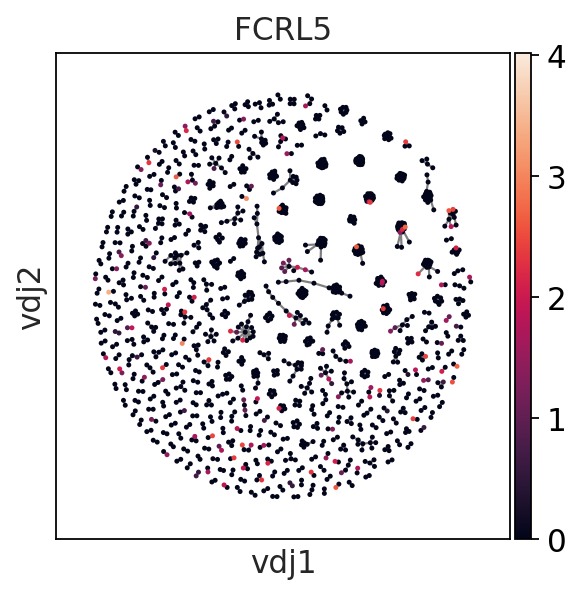

In [59]:
ddl.pl.clone_network(adata,
                     color = ['FCRL5'],
                     legend_fontoutline=3,
                     edges_width = 1,
                     size = 20)

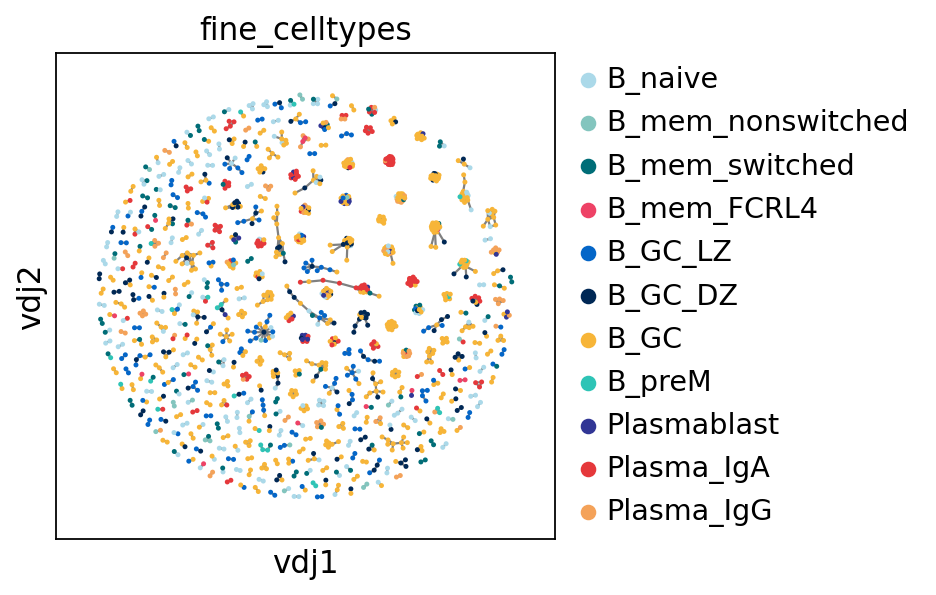

In [20]:
ddl.pl.clone_network(adata[adata.obs['broad_celltypes'].isin(['B','Plasma'])],
                     color = ['fine_celltypes'],
                     legend_fontoutline=3,
                     edges_width = 1,
                     size = 20)

In [28]:
import matplotlib as mpl

In [29]:
vdj

Dandelion class object with n_obs = 10881 and n_contigs = 21737
    data: 'sequence_id', 'sequence', 'rev_comp', 'productive', 'v_call', 'd_call', 'j_call', 'sequence_alignment', 'germline_alignment', 'junction', 'junction_aa', 'v_cigar', 'd_cigar', 'j_cigar', 'stop_codon', 'vj_in_frame', 'locus', 'junction_length', 'np1_length', 'np2_length', 'v_sequence_start', 'v_sequence_end', 'v_germline_start', 'v_germline_end', 'd_sequence_start', 'd_sequence_end', 'd_germline_start', 'd_germline_end', 'j_sequence_start', 'j_sequence_end', 'j_germline_start', 'j_germline_end', 'v_score', 'v_identity', 'v_support', 'd_score', 'd_identity', 'd_support', 'j_score', 'j_identity', 'j_support', 'fwr1', 'fwr2', 'fwr3', 'fwr4', 'cdr1', 'cdr2', 'cdr3', 'cell_id', 'c_call', 'consensus_count', 'umi_count', 'v_call_10x', 'd_call_10x', 'j_call_10x', 'junction_10x', 'junction_10x_aa', 'v_call_genotyped', 'germline_alignment_d_mask', 'sample_id', 'c_sequence_alignment', 'c_germline_alignment', 'c_sequence_star

(<Figure size 2500x400 with 1 Axes>,
 <AxesSubplot:title={'center':'v call genotyped VDJ usage'}, ylabel='proportion'>)

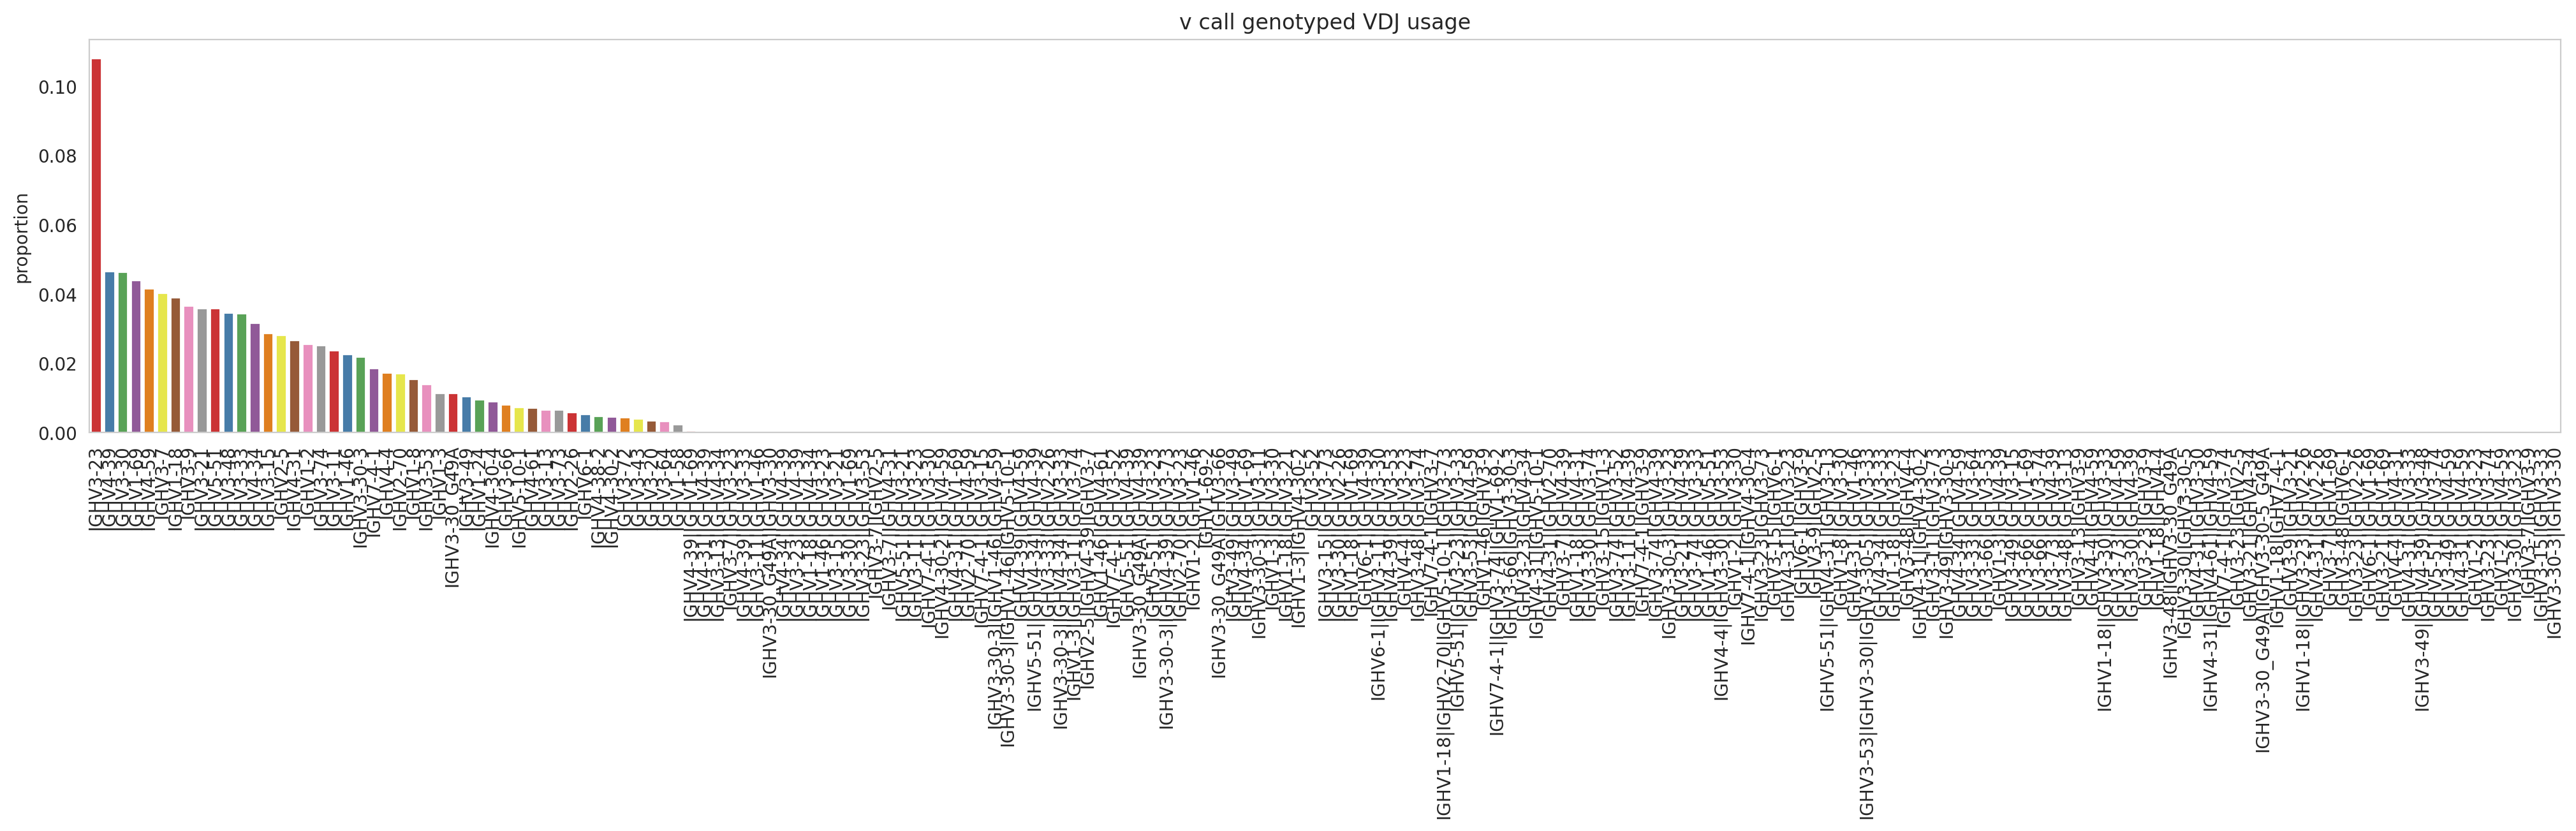

In [31]:
mpl.rcParams.update(mpl.rcParamsDefault)
ddl.pl.barplot(vdj,
               color = 'v_call_genotyped_VDJ',
               figsize = (25, 4))

In [53]:
ddl.tl.clone_overlap(adata,
                     groupby = 'leiden',
                     colorby = 'patient_id')

In [36]:
import nxviz

In [30]:
adata

AnnData object with n_obs × n_vars = 55529 × 1723
    obs: 'latent_RT_efficiency', 'latent_cell_probability', 'latent_scale', 'sample_id', 'patient_id', 'sample_type', 'age_group', 'gender', 'cohort', 'disease_type', 'batch', 'study', 'nasal_inflammation', 'COVID_severity', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'scrublet_score', 'n_genes', 'gmm_pct_count_clusters_keep', 'is_doublet', 'filter_rna', 'leiden', 'celltypist_label', 'broad_celltypes', 'matt_fine_label', 'fine_celltypes', 'old_fine_celltypes', 'old_broad_celltypes', 'has_contig', 'filter_contig_quality', 'filter_contig_VDJ', 'filter_contig_VJ', 'contig_QC_pass', 'filter_contig', 'clone_id', 'clone_id_by_size', 'locus_VDJ', 'locus_VJ', 'productive_VDJ', 'productive_VJ', 'v_call_genotyped_VDJ', 'v_call_genotyped_VJ', 'd_call_VDJ', 'j_call_VDJ', 'j_call_VJ', 'c_call_VDJ', 'c_call_VJ', 'duplicate_count_VDJ', 'duplicate_count_VJ', 'duplicate_count_VDJ_1', 'duplicate_count_VJ_1', 'duplicate_count_

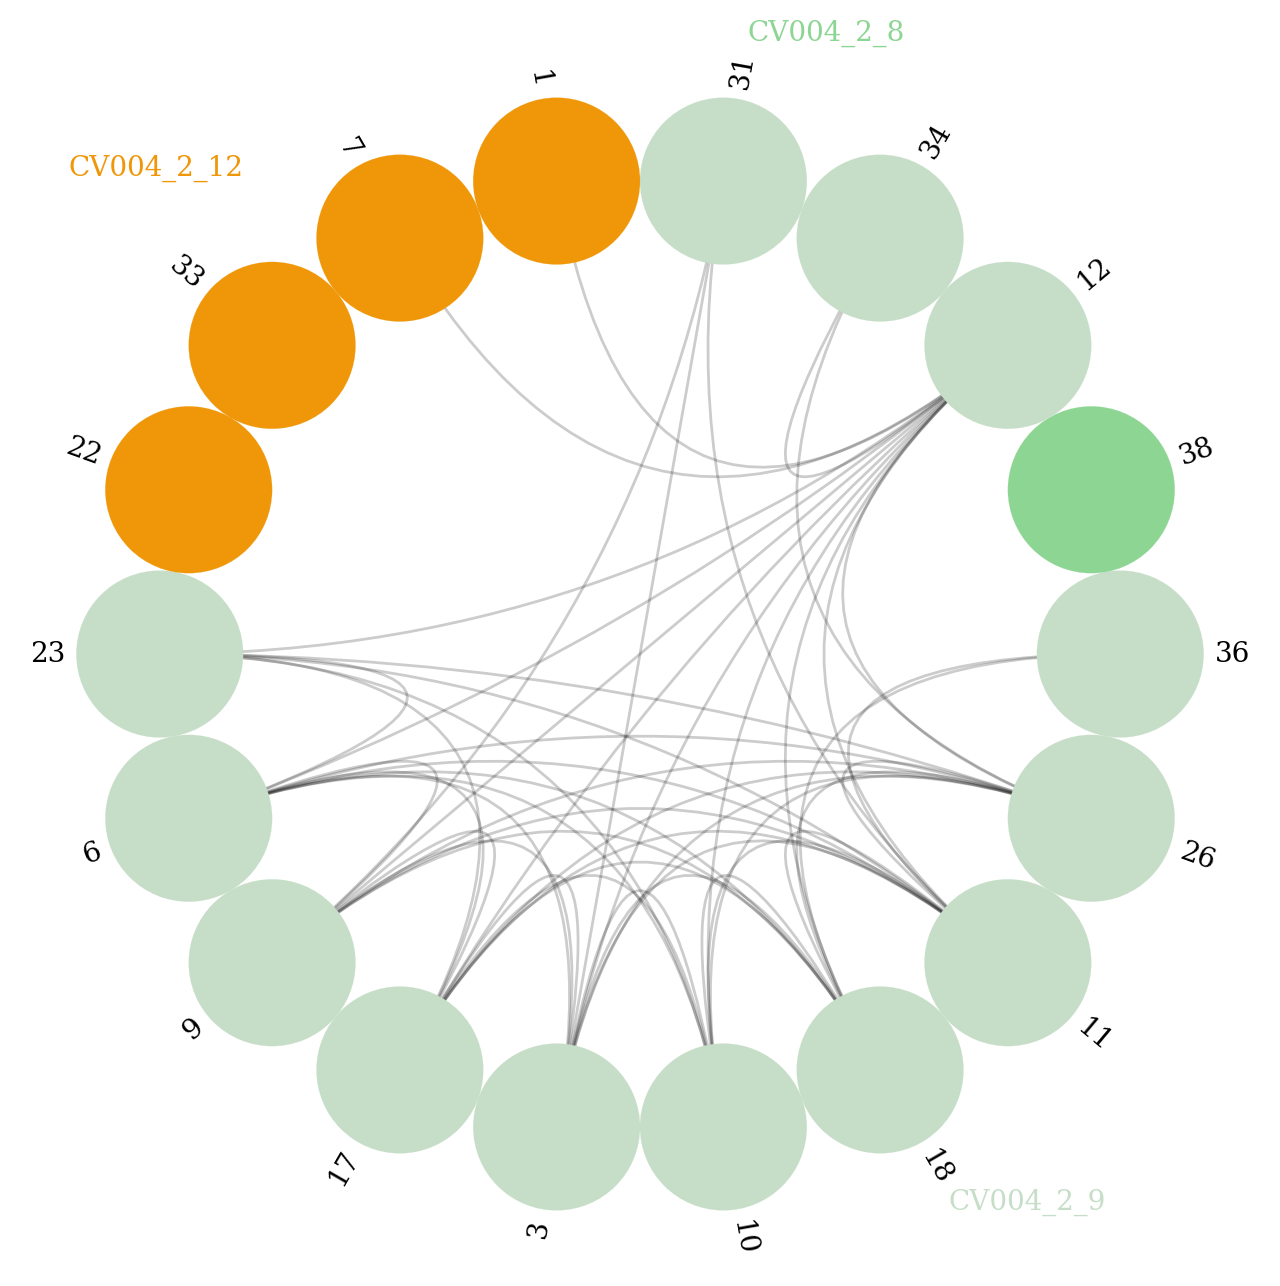

In [54]:
ddl.pl.clone_overlap(adata,
                     groupby = 'leiden',
                     colorby = 'patient_id',
                     return_graph=True,
                     group_label_offset=.5)

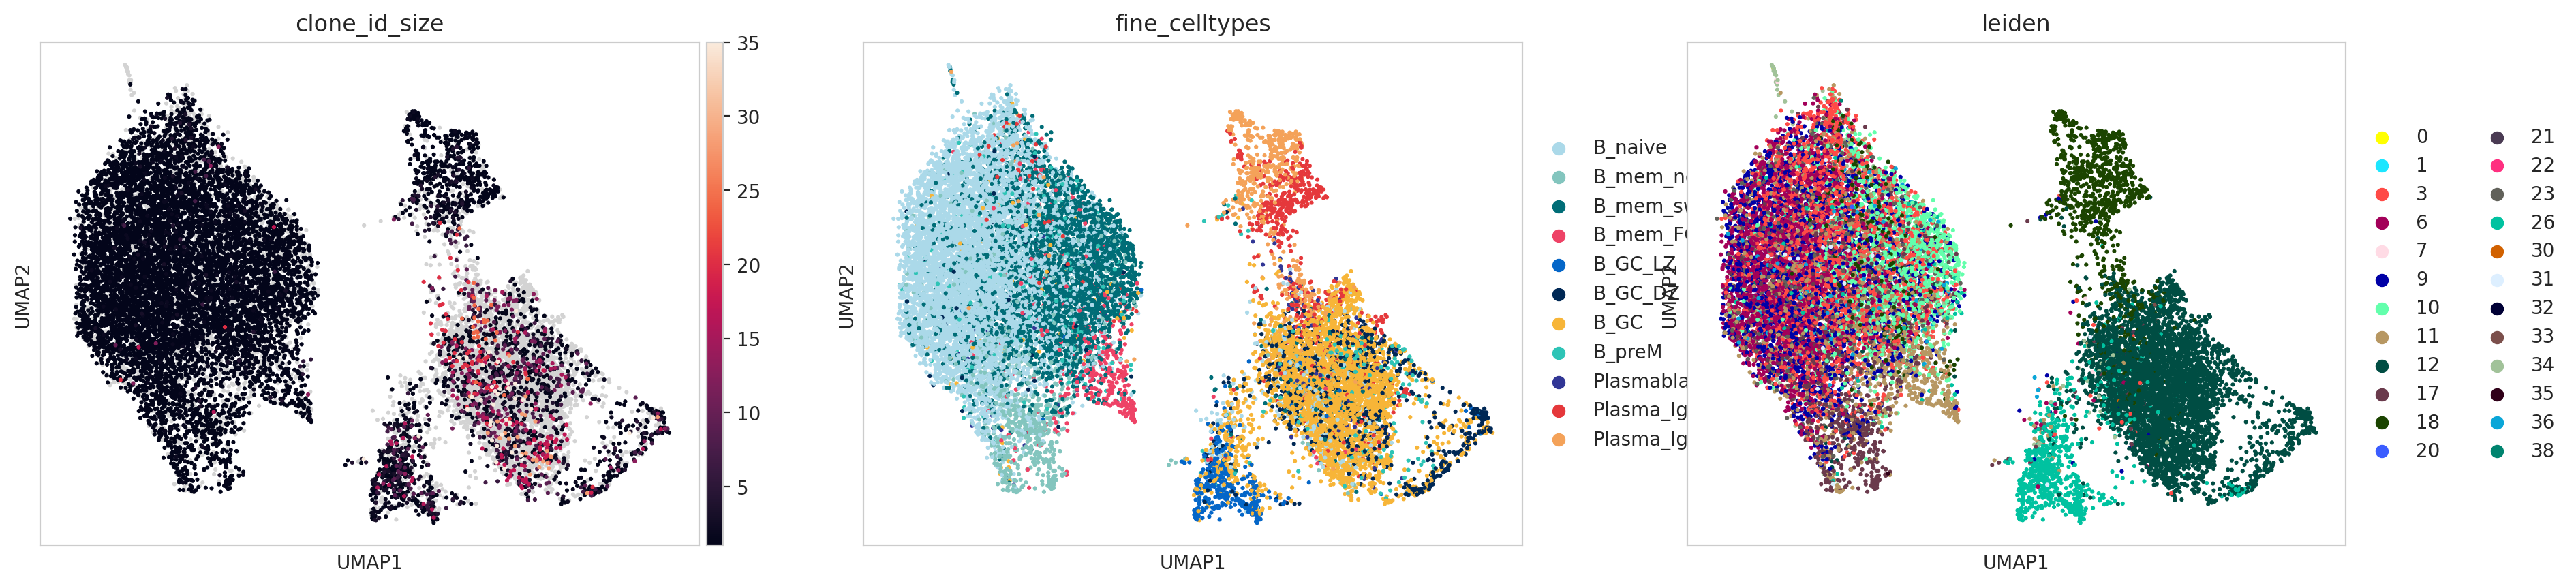

In [56]:
sc.pl.umap(adata, color = ['clone_id_size', 'fine_celltypes','leiden'], size = 20)